Teste prático 3

In [1]:
import pandas as pd
import statistics as est
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
tabela = pd.read_csv('dados.csv', sep=';')
tabela.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [3]:
tabela.shape

(187, 4)

In [4]:
tabela

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [5]:
tabela.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [6]:
tabela.loc[tabela.duplicated('CODIGO')]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98
94,378,MULITERNO,19914.82,97594.98
95,378,SANTO ANTONIO DAS MISSOES,19914.82,97594.98
126,380,SANTO ANTONIO DO PLANALTO,18676.57,58868.19


In [7]:
tabela.loc[tabela['PIB']>60000]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
91,356,GARRUCHOS,68672.25,271841.26
146,453,MUITOS CAPOES,72353.72,140597.55


In [8]:
tabela.loc[tabela['MUNICIPIO']=='TRIUNFO']

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82


In [9]:
tabela['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

In [10]:
Mediana = est.median(tabela['PIB'])
Mediana

17206.19

In [11]:
tabela.loc[tabela['PIB']>150000,'PIB']=Mediana

In [12]:
tabela.loc[tabela['MUNICIPIO']=='TRIUNFO']

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,17206.19,1442759.82


<AxesSubplot:xlabel='PIB', ylabel='Count'>

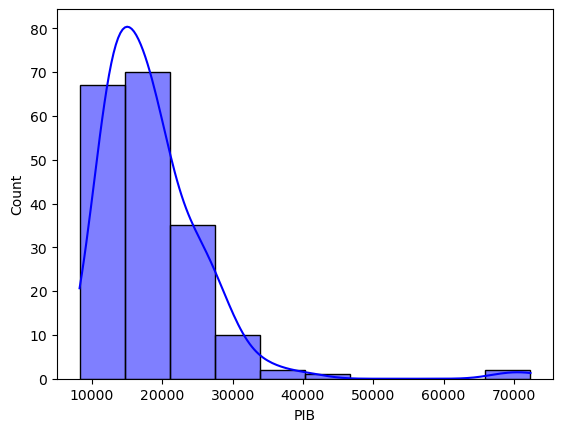

In [13]:
sea.histplot(tabela.iloc[:,2], kde=True, bins = 10, color= 'blue')

Text(0.5, 1.0, 'PIB')

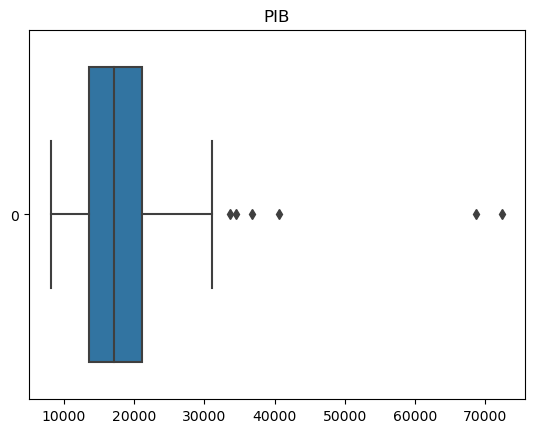

In [14]:
sea.boxplot(data=tabela.PIB, orient='h').set_title('PIB')

In [15]:
tabela['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

<AxesSubplot:xlabel='VALOREMPENHO', ylabel='Count'>

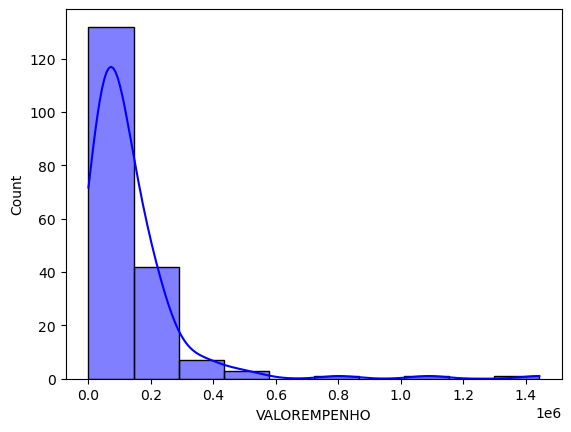

In [16]:
sea.histplot(tabela.iloc[:,3], kde=True, bins = 10, color= 'blue')

Text(0.5, 1.0, 'VALOR EMPENHO')

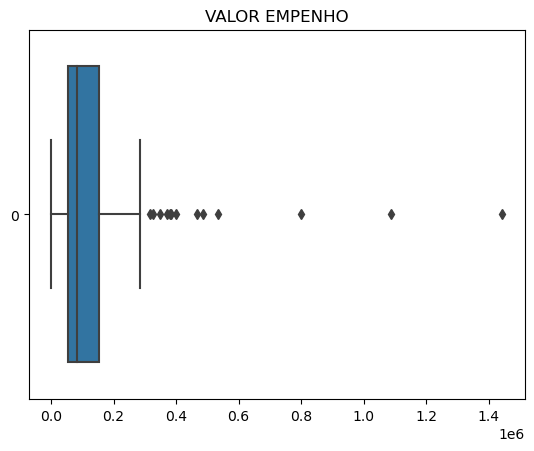

In [17]:
sea.boxplot(data=tabela.VALOREMPENHO, orient='h').set_title('VALOR EMPENHO')

<AxesSubplot:xlabel='PIB', ylabel='VALOREMPENHO'>

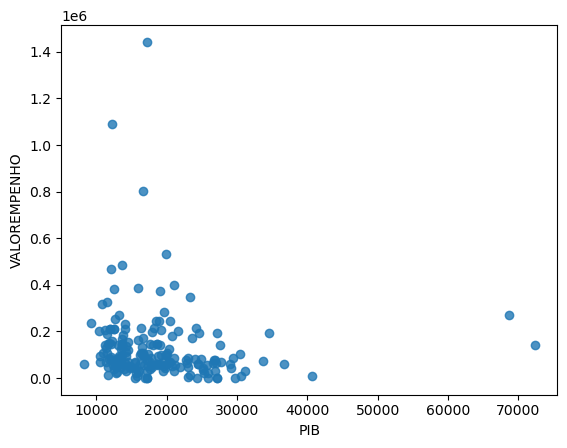

In [18]:
sea.regplot(x=tabela.PIB,y=tabela.VALOREMPENHO, data = tabela, x_jitter = 0.3, fit_reg = False,)

<AxesSubplot:xlabel='MUNICIPIO'>

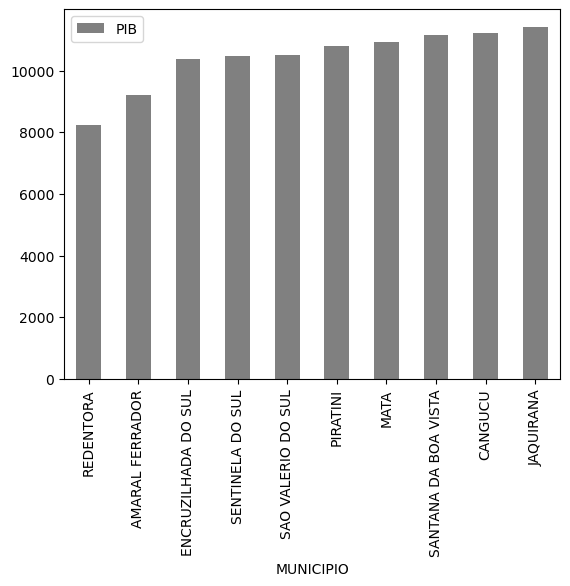

In [19]:
agrupado = tabela.sort_values('PIB').head(10)
agrupado = agrupado.iloc[:,[1,2]]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')

In [20]:
agrupado

,MUNICIPIO,PIB
88,REDENTORA,8236.63
11,AMARAL FERRADOR,9216.87
15,ENCRUZILHADA DO SUL,10372.80
66,SENTINELA DO SUL,10477.52
89,SAO VALERIO DO SUL,10503.72
6,PIRATINI,10811.67
56,MATA,10935.82
37,SANTANA DA BOA VISTA,11172.34
16,CANGUCU,11213.34
47,JAQUIRANA,11413.37


<AxesSubplot:xlabel='MUNICIPIO'>

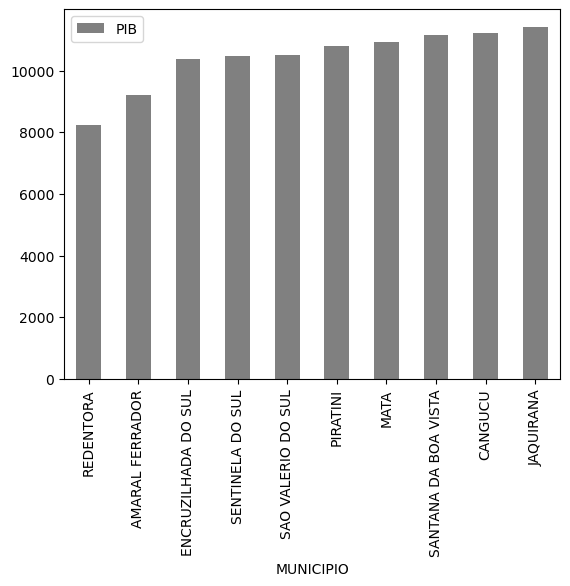

In [21]:
#Não precisa pegar só os dois dados 
agrupado = tabela.sort_values('PIB').head(10)
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')

<AxesSubplot:xlabel='MUNICIPIO'>

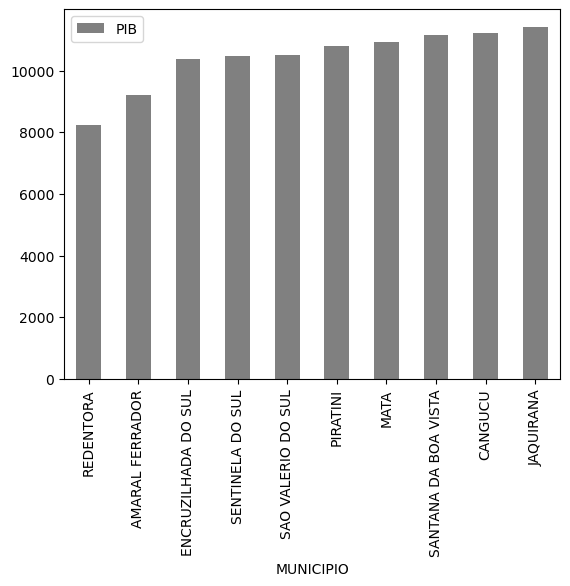

In [22]:
#Pode ser feito assim também no [1,2]
agrupado = tabela.sort_values('PIB').head(10)
agrupado = agrupado.iloc[:,[1,2]]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')

<AxesSubplot:xlabel='MUNICIPIO'>

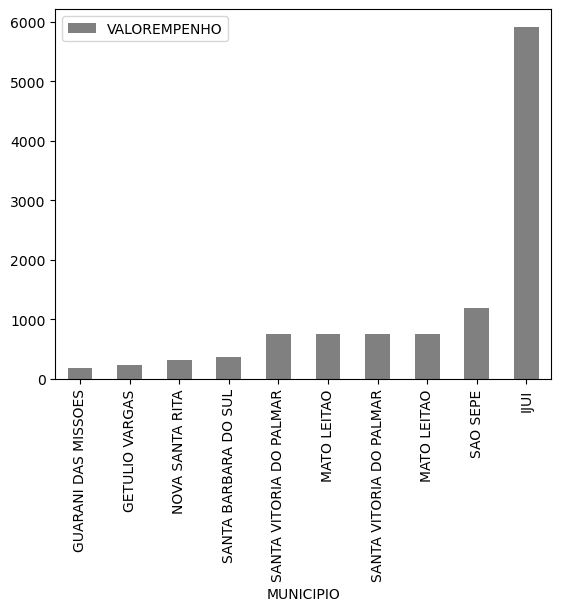

In [23]:
agrupado = tabela.sort_values('VALOREMPENHO').head(10)
agrupado = agrupado.iloc[:,[1,3]]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'gray')

In [24]:
selecionados = tabela.loc[tabela['MUNICIPIO'].isin(['PORTO ALEGRE','VIADUTOS','VILA MARIA'])]
selecionados

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
138,158,VIADUTOS,12520.25,38128.96
169,329,VILA MARIA,31104.22,28149.89
175,96,PORTO ALEGRE,30524.80,9358.33


<AxesSubplot:xlabel='MUNICIPIO'>

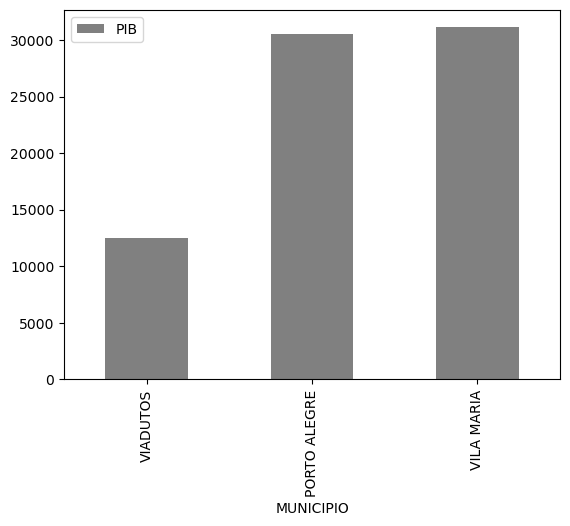

In [25]:
selecionados1 = selecionados.sort_values('PIB').head(3)
selecionados1.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')